In [1]:
import numpy as np
import pandas as pd
from feature_transform import FeatureTransform
from utils import *

In [2]:
train_folder = '../data/train/Inertial_Signals/'
test_folder = '../data/test/Inertial_Signals/'
train_labels = '../data/train/y_train.txt'
test_labels = '../data/test/y_test.txt'

train_signals, test_signals, train_labels, test_labels = load_data(train_folder, test_folder,
                                                                   train_labels, test_labels)

number of train signals, length of each signal, number of components: (7352, 128, 9)
number of test signals, length of each signal, number of components: (2947, 128, 9)


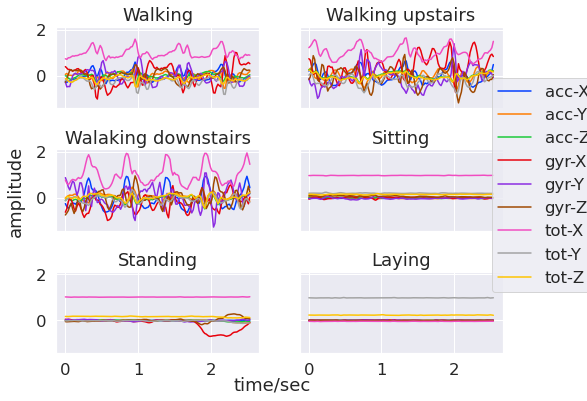

In [3]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8, 6))
fig.subplots_adjust(hspace = .5)
fig.text(0.5, 0.04, 'time/sec', ha='center')
fig.text(0.04, 0.5, 'amplitude', va='center', rotation='vertical')


axs = axs.flatten()
axs_labels = ['Walking', 'Walking upstairs', 'Walaking downstairs', 'Sitting', 'Standing', 'Laying']
line_labels = ["acc-X", "acc-Y", "acc-Z", "gyr-X", "gyr-Y", "gyr-Z", "tot-X", "tot-Y", "tot-Z"]

for j in range(1, 7):
    signals = train_signals[np.where(train_labels == j)]
    A = FeatureTransform(signals[123])
    x, y = A.get_ints(signals[123])
    for i in range (0, 9):
        l = axs[j-1].plot(x, y[:, i])
        axs[j-1].set_title(axs_labels[j-1])
        
fig.legend([l],    
           labels=line_labels,  
           loc="center right",  
#            borderaxespad=0.1,    
#            title="Legend Title",
           bbox_to_anchor=(1.05, 0.5)
           )
plt.show()

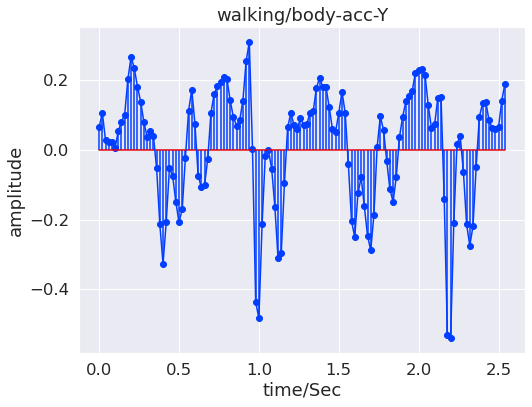

In [4]:
walking_up_signals = train_signals[np.where(train_labels == 1)]
B = FeatureTransform(walking_up_signals[123])
a, b = B.get_ints(walking_up_signals[123])
plot_stem(a, b[:, 1], "walking/body-acc-Y")

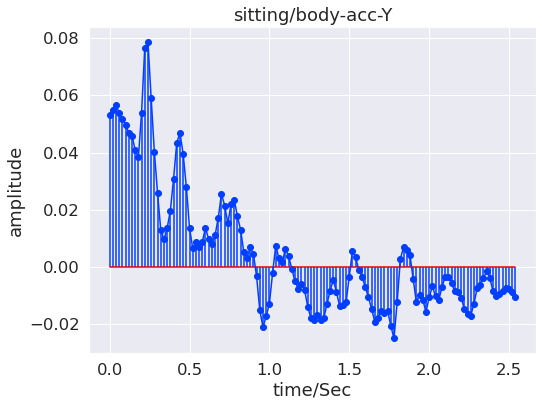

In [5]:
walking_up_signals = train_signals[np.where(train_labels == 4)]
B = FeatureTransform(walking_up_signals[123])
a, b = B.get_ints(walking_up_signals[123])
plot_stem(a, b[:, 1], "sitting/body-acc-Y")

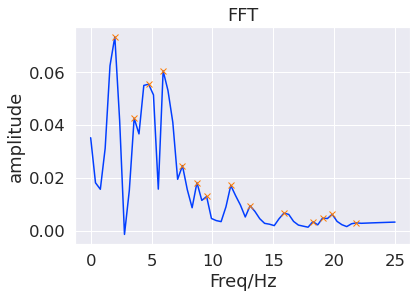

In [6]:
walking_up_signals = train_signals[np.where(train_labels == 1)]
B = FeatureTransform(walking_up_signals)
a, b = B.get_ffts(walking_up_signals[1, :, 1])
x, y = a, b
plot_feature(x, y, 'FFT')

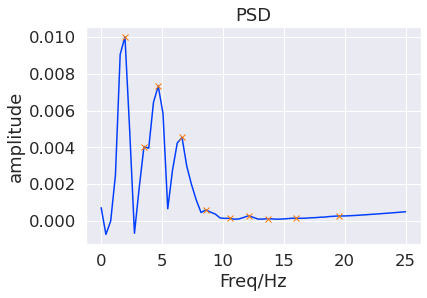

In [7]:
walking_up_signals = train_signals[np.where(train_labels == 1)]
B = FeatureTransform(walking_up_signals)
a, b = B.get_psds(walking_up_signals[1, :, 1])
x, y = a, b
plot_feature(x, y, 'PSD')

In [8]:
n = 5000  
index = np.random.choice(train_signals.shape[0], n, replace=False) 
x_train_random = train_signals[index]
y_train_random = train_labels[index]
x_train_random.shape

(5000, 128, 9)

In [9]:
n = 1000  
index = np.random.choice(test_signals.shape[0], n, replace=False) 
x_test_random = test_signals[index]
y_test_random = test_labels[index]
x_test_random.shape

(1000, 128, 9)

In [ ]:
scales = range(1, 128)
waveletname = 'morl'
train_size = 5000
test_size= 1000

x_test_random_cwt = np.ndarray(shape=(test_size, 9, 127, 127))
for ii in range(0, test_size):
    if ii % 500 == 0:
        print(ii)
    for jj in range(0, 9):
        signal = x_test_random[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:, :127]
        x_test_random_cwt [ii, jj, :, :] = coeff_

x_train_random_cwt = np.ndarray(shape=(train_size, 9, 127, 127))
 
for ii in range(0, train_size):
    if ii % 1000 == 0:
        print(ii)
    for jj in range(0, 9):
        signal = x_train_random[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:, :127]
        x_train_random_cwt[ii, jj, :, :] = coeff_
np.save('x_train_random_cwt.npy', x_train_random_cwt)
np.save('x_test_random_cwt.npy', x_test_random_cwt)
np.save('y_train_random.npy', y_train_random)
np.save('y_test_random.npy', y_test_random)